#**Задача 2.3**
Известно, что электричка "Вашингтон-Петушки" аварийно останавливается раз в несколько дней. Аналитики РЖД проанализировали, сколько дней электричка едет без поломок, и составили выборку: $X = (3, 22, 13, 6, 18, 5, 6, 10, 7, 15)$.

РЖД хочет проверить гипотезу, что дисперсия распределения равна 9 против правосторонней альтернативы.

Требуется:

1.   Ввести предположение, каким распределением описывается данная выборка.
2.   Записать задачу формально.
3.   Предложить критерий для оценки дисперсии распределения.
4.   Проверить гипотезу о значении дисперсии распределения для уровня значимости $\alpha = 0.05$ аналитически.
5.   Вывести и получить доверительный интервал для значения дисперсии при $\alpha = 0.05$.

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компьютера для подстановки численных значений в финальную формулу)

---

##**Решение**

In [1]:
import numpy as np
import numpy.random
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

In [20]:
# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 12
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 32
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['figure.figsize'] = (8.0, 6.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 13

##Распределение выборки
*Я так и не поняла, можно ли на этом этапе строить графики, но для себя я строила*

Text(0.5, 1.0, 'Q-Q plot выборки')

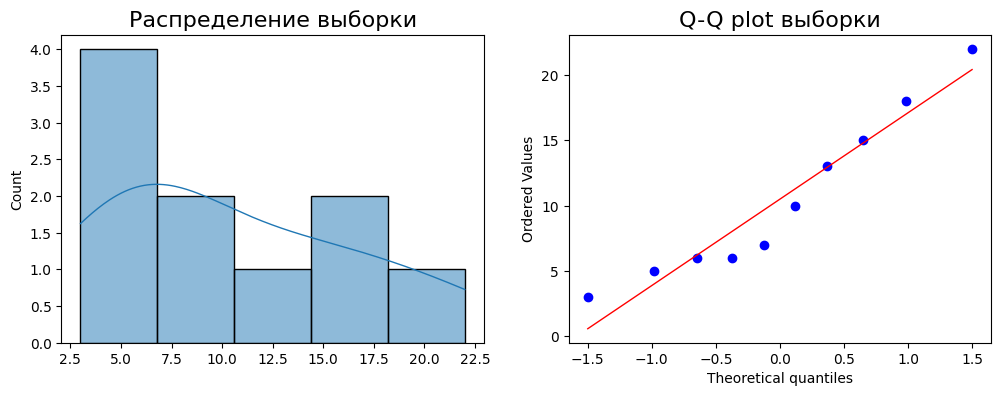

In [21]:
x = np.array([3, 22, 13, 6, 18, 5, 6, 10, 7, 15])
#перенастройка шрифтов
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['axes.titlesize'] = 16

plt.rcParams['axes.labelsize'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(x, ax=axes[0], kde=True)
axes[0].set_title('Распределение выборки')
qq_points, qq_line = st.probplot(x, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot выборки')
#sns.distplot(x, hist=True)

В целом, можно сделать предположение о нормальности выборки, хотя малый размер выборки делает графические методы бесполезными. Проверим сразу тестом Шапиро-Уилка 

In [22]:
st.shapiro(x)

ShapiroResult(statistic=0.9227311015129089, pvalue=0.38029807806015015)

Т.к. $\text{p-value}=0.38 \geq 0.05$, то гипотеза о нормальности не отвергается

##Формальная запись задачи
$$H_0: \sigma^2 = 9\\
H_1: \sigma^2 > 9$$

##Критерий
В предположении о нормальности выборки воспользуемся **критерием хи-квадрат**. Запишем его формулировку для правосторонней альтернативы:
\begin{align*}
& X \sim N(\mu, \sigma^2)\\
& H_0: \sigma = \sigma_0 \\
& H_1: \sigma > \sigma_0 \\
\text{статистика: } & \chi^2(X^n) = | \\
\text{нулевое распределение: } & \chi^2_{n-1}\\
& p(\chi^2) = 1 - F_{\chi^2_{n-1}}(\chi^2)
\end{align*}

##Проверка гипотезы на уровне значимости $\alpha = 0.05$
Подставим в формулы численные значения и посчитаем значение p-value:


In [34]:
print('Выборочное среднее x_mean = ', x.mean())
S2 = x.var(ddof=1)
print('Выборочная дисперсия S^2 = ', S2)
sigma2 = 9
n = 10
T = (n-1) * x.var(ddof=1) / sigma2
print('Статистика T = ', T)
p = 1 - st.distributions.chi2.cdf(T, n-1)
print('Статистика p = ', p)
if p < 0.05:
  print("Нулевая гипотеза отвергается")
else:
  print("Нулевая гипотеза не отвергается")

Выборочное среднее x_mean =  10.5
Выборочная дисперсия S^2 =  39.388888888888886
Статистика T =  39.388888888888886
Статистика p =  9.801382711449591e-06
Нулевая гипотеза отвергается


##Доверительные интервалы
\begin{align*}
&  \mathbb{P}\big(\chi^2_{\frac{\alpha}{2}, n-1} <T<\chi^2_{1 - \frac{\alpha}{2}, n-1}\big) = 1-\alpha \\
& \mathbb{P}\big(\chi^2_{\frac{\alpha}{2}, n-1} < \dfrac{(n-1)S^2}{\sigma^2} <\chi^2_{1 - \frac{\alpha}{2}, n-1}\big) = 1-\alpha \\
& \mathbb{P}\Big(\dfrac{(n-1)S^2}{\chi^2_{1 - \frac{\alpha}{2}, n-1}} < \sigma^2 < \dfrac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}, n-1}}\Big) = 1-\alpha \\
\end{align*}

In [37]:
alpha = 0.05
(lower_bound, upper_bound) = ((n-1)* S2 / st.chi2(n - 1).ppf(1 - (alpha / 2)), (n-1)* S2 / st.chi2(n - 1).ppf(alpha / 2))
print((lower_bound, upper_bound))

(18.635563644177687, 131.27735832278213)


Доверительный интервал [18.64; 131.28]
 